In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from matplotlib import pyplot as plt
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (20, 6) #Estas dos lineas me ayudan a controlar el tamaño de los plots en el notebook
import seaborn as sns
import warnings  
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import  accuracy_score, r2_score
from sklearn.tree import DecisionTreeClassifier
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

Populating the interactive namespace from numpy and matplotlib
['Guia_CSV_251 2.csv']


In [2]:
data = pd.read_csv('data/automoviles.csv')

In [3]:
data.head()

,Novedad,Marca,Clase,Codigo,HomologoCodigo,Referencia1,Referencia2,Referencia3,Peso,IdServicio,Servicio,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,Bcpp,Importado,Potencia,TipoCaja,Cilindraje,Nacionalidad,CapacidadPasajeros,CapacidadCarga,Puertas,AireAcondicionado,Ejes,Estado,Combustible,Transmision,Um,PesoCategoria
0,M,ALEKO,AUTOMOVIL,101001,NaN,2141,1.6,MT 1600CC TAXI,1380,2,Publico,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12200,15300,1,82,MT,1570,RUS,5,0,5,0,2,Activo,GSL,4X2,0,1
1,M,AMERICAN MOTOR,CAMIONETA PASAJ.,206001,NaN,EAGLE,SUMMIT,AT 2400CC LX 4P,0,1,Particular,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6100,6500,7000,7500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,43800,54800,1,0,AT,2351,NaN,5,0,5,0,2,Activo,NaN,NaN,0,1
2,M,AMERICAN MOTOR,CAMPERO,208003,NaN,WRANGLER,4.2,MT 4200CC CAB,1100,1,Particular,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11900,12800,13700,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,81600,102000,1,120,MT,2400,USA,5,0,3,1,2,Activo,NaN,4X4,0,1
3,M,AMERICAN MOTOR,CAMPERO,208004,NaN,WRANGLER,4.2,MT 2500CC CARPADO,1100,1,Particular,0,0,0,0,0,0,0,0,4600,4900,5300,5700,6100,6500,7000,7500,8100,8700,9300,10000,10700,11500,12300,13200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,74900,93600,1,120,MT,2400,USA,5,0,3,1,2,Activo,NaN,4X4,0,1
4,M,AUTECO,MOTOCICLETA,317003,NaN,SUMA,80,MT 80CC 2T,75,1,Particular,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,260,280,300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2800,3200,0,6,MT,80,COL,2,0,0,0,2,Activo,GSL,2X1,0,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12433 entries, 0 to 12432
Data columns (total 76 columns):
Novedad               12433 non-null object
Marca                 12433 non-null object
Clase                 12433 non-null object
Codigo                12433 non-null int64
HomologoCodigo        0 non-null float64
Referencia1           12433 non-null object
Referencia2           12433 non-null object
Referencia3           12433 non-null object
Peso                  12433 non-null int64
IdServicio            12433 non-null int64
Servicio              12433 non-null object
1970                  12433 non-null int64
1971                  12433 non-null int64
1972                  12433 non-null int64
1973                  12433 non-null int64
1974                  12433 non-null int64
1975                  12433 non-null int64
1976                  12433 non-null int64
1977                  12433 non-null int64
1978                  12433 non-null int64
1979                  1243

In [5]:
data.describe()

,Codigo,HomologoCodigo,Peso,IdServicio,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,Bcpp,Importado,Potencia,Cilindraje,CapacidadPasajeros,CapacidadCarga,Puertas,AireAcondicionado,Ejes,Um,PesoCategoria
count,1.243300e+04,0.0,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.00000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,1.243300e+04,12433.000000,1.243300e+04,1.243300e+04,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000
mean,8.406562e+06,NaN,1777.958015,1.226253,38.888442,50.859809,55.026140,72.848870,82.803024,86.653261,92.260114,100.474544,117.504223,134.277326,211.791201,209.758707,232.868173,257.212258,271.152578,330.082040,393.966862,445.798279,521.414783,580.143167,730.127081,814.888603,1024.264457,1276.396686,1480.47012,1752.597925,1755.222392,2119.256012,2211.691466,2321.862785,2501.681010,2771.043192,3263.728786,3792.323655,4591.963323,5477.313601,6794.499316,7796.331537,9096.765061,8432.478887,8195.447599,9933.559881,11420.373200,12368.696212,12199.927612,14772.605164,1.361666e+04,12813.431995,8.599155e+04,1.063156e+05,0.840666,134.683021,2584.716319,4.555055,2394.048420,2.951983,0.550068,2.048580,0.033942,1.045041
std,8.257674e+06,NaN,2152.615612,0.418421,748.805754,868.556571,920.438342,1084.171113,1188.044579,1224.174105,1292.572880,1375.557837,1497.622366,1618.104386,2036.133032,2036.295733,2173.735256,2338.936720,2478.578669,2798.410446,3263.603975,3580.373154,3901.986849,4203.311351,4746.645913,4911.180435,5516.352270,6039.931253,6678.68568,7406.390439,7683.574512,8518.512940,8932.374079,9569.137443,10439.631424,11123.754916,12324.425167,13458.054824,15275.653879,17089.570013,21497.228645,21859.059202,24132.523557,24695.246048,26080.217752,29818.371017,33203.324001,36103.221723,37675.793778,45310.776119,4.899490e+04,49525.622290,8.567971e+04,1.065270e+05,0.366002,96.166467,2308.234051,4.982099,6774.820501,1.770366,0.497507,0.288488,0.181087,0.719219
min,1.010010e+05,NaN,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.400000e+03,1.800000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.201240e+06,NaN,268.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,3.560000e+04,4.380000e+04,1.000000,80.000000,1339.000000,2.000000,0.000000,2.000000,0.000000,2.000000,0.000000,1.000000
50%,6.201016e+06,NaN,1355.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

In [6]:
data.drop(columns = 'HomologoCodigo', inplace = True)

In [7]:
motos = data[data['Clase'] == 'MOTOCICLETA']
motos

,Novedad,Marca,Clase,Codigo,Referencia1,Referencia2,Referencia3,Peso,IdServicio,Servicio,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,Bcpp,Importado,Potencia,TipoCaja,Cilindraje,Nacionalidad,CapacidadPasajeros,CapacidadCarga,Puertas,AireAcondicionado,Ejes,Estado,Combustible,Transmision,Um,PesoCategoria
4,M,AUTECO,MOTOCICLETA,317003,SUMA,80,MT 80CC 2T,75,1,Particular,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,260,280,300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2800,3200,0,6,MT,80,COL,2,0,0,0,2,Activo,GSL,2X1,0,1
5,M,AUTECO,MOTOCICLETA,317004,KTZ,100,MT 100CC,78,1,Particular,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,370,400,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2900,3300,0,5,MT,100,COL,2,0,0,0,2,Activo,GSL,2X1,0,1
6,M,AUTECO,MOTOCICLETA,317006,BAJAJ,PLUS POWER,AT 150CC,95,1,Particular,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,380,410,440,470,500,570,610,650,700,800,900,1000,0,0,0,0,0,0,0,0,0,0,0,4800,5500,0,7,AT,150,COL,2,0,0,0,2,Activo,GSL,2X1,0,1
7,M,AUTECO,MOTOCICLETA,317007,ZIP,80,AT 80CC,77,1,Particular,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,400,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2900,3300,0,6,MT,80,COL,2,0,0,0,2,Activo,GSL,2X1,0,1
8,M,AUTECO,MOTOCICLETA,317008,KB,125,MT 125CC,93,1,Particular,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2700,3100,0,13,MT,125,COL,2,0,0,0,2,Activo,GSL,2X1,0,1
9,M,AUTECO,MOTOCICLETA,317009,SUNNY,80,MT 80CC,105,1,Particular,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2700,3100,0,6,MT,80,COL,2,0,0,0,2,Activo,GSL,2X1,0,1
10,M,AUTECO,MOTOCICLETA,317010,BAJAJ,PLUS CLASSIC,MT 150CC,106,1,Particular,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,380,410,440,470,500,550,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5300,6100,0,7,MT,150,COL,2,0,0,0,2,Activo,GSL,2X1,0,1
11,M,AUTECO,MOTOCICLETA,317015,BAJAJ,BOXER CT100,MT 100CC,113,1,Particular,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,700,750,800,900,1000,1100,1200,1300,1400,1500,1700,1900,2400,2600,2800,3100,3500,4400,1,8,MT,99,IND,2,0,0,0,2,Activo,GSL,2X1,1,1
12,M,AUTECO,MOTOCICLETA,317016,BAJAJ,LEGEND,MT 150CC,108,1,Particular,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1100,1200,1300,1400,0,0,0,0,0,0,0,0,0,0,0,0,4400,5100,0,9,MT,145,COL,2,0,0,0,2,Activo,GSL,2X1,0,1
13,M,AUTECO,MOTOCICLETA,317017,BAJAJ,BRAVO,MT 145CC,103,1,Particular,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1100,1200,1300,1400,1500,0,0,0,0,0,0,0,0,0,0,0,0,4700,5400,0,8,MT,145,COL,2,0,0,0,2,Activo,GSL,2X1,0,1


In [8]:
data = data[data.Clase != 'MOTOCICLETA']

In [9]:
print('Existen {} clases, las cuales son : {}'.format(data.Clase.nunique(),data.Clase.unique()))

Existen 18 clases, las cuales son : ['AUTOMOVIL' 'CAMIONETA PASAJ.' 'CAMPERO' 'MOTOCARRO' 'PICKUP DOBLE CAB'
 'BUS / BUSETA / MICROBUS' 'CAMIONETA REPAR' 'PICKUP SENCILLA'
 'REMOLCADOR' 'CAMION' 'CARROTANQUE' 'CHASIS' 'FURGON' 'VOLQUETA' 'UNIMOG'
 'FURGONETA' 'ISOCARRO' 'REMOLQUE']


In [10]:
print('Existen {} clases, las cuales son : {}'.format(data.Clase.nunique(),data.Clase.unique()))

Existen 18 clases, las cuales son : ['AUTOMOVIL' 'CAMIONETA PASAJ.' 'CAMPERO' 'MOTOCARRO' 'PICKUP DOBLE CAB'
 'BUS / BUSETA / MICROBUS' 'CAMIONETA REPAR' 'PICKUP SENCILLA'
 'REMOLCADOR' 'CAMION' 'CARROTANQUE' 'CHASIS' 'FURGON' 'VOLQUETA' 'UNIMOG'
 'FURGONETA' 'ISOCARRO' 'REMOLQUE']


In [11]:
null_data = data[data.isnull().any(axis = 1)]
null_data.count()

Novedad               677
Marca                 677
Clase                 677
Codigo                677
Referencia1           677
Referencia2           677
Referencia3           677
Peso                  677
IdServicio            677
Servicio              677
1970                  677
1971                  677
1972                  677
1973                  677
1974                  677
1975                  677
1976                  677
1977                  677
1978                  677
1979                  677
1980                  677
1981                  677
1982                  677
1983                  677
1984                  677
1985                  677
1986                  677
1987                  677
1988                  677
1989                  677
                     ... 
2005                  677
2006                  677
2007                  677
2008                  677
2009                  677
2010                  677
2011                  677
2012        

In [12]:
data.dropna(inplace = True)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10265 entries, 0 to 12432
Data columns (total 75 columns):
Novedad               10265 non-null object
Marca                 10265 non-null object
Clase                 10265 non-null object
Codigo                10265 non-null int64
Referencia1           10265 non-null object
Referencia2           10265 non-null object
Referencia3           10265 non-null object
Peso                  10265 non-null int64
IdServicio            10265 non-null int64
Servicio              10265 non-null object
1970                  10265 non-null int64
1971                  10265 non-null int64
1972                  10265 non-null int64
1973                  10265 non-null int64
1974                  10265 non-null int64
1975                  10265 non-null int64
1976                  10265 non-null int64
1977                  10265 non-null int64
1978                  10265 non-null int64
1979                  10265 non-null int64
1980                  10

In [14]:
marcas_count = data.groupby('Marca')[['Clase']].count()
marcas_count.sort_values('Clase').reset_index()
marcas_count.columns = ['Tipo de vehiculo']
marcas_count[:]

,Tipo de vehiculo
Marca,
ACURA,6
AGRALE,35
AKT,10
ALEKO,1
ALFA ROMEO,9
AMPLE,2
ARCTIC CAT,3
AROCARPATI,2
ASIA,9


In [15]:
data['Marca'].nunique()

163

In [16]:
data['Marca'].unique()

array(['ALEKO', 'AUTECO', 'AROCARPATI', 'ASIA', 'AUDI', 'BMW', 'DINA',
       'BUICK', 'CADILLAC', 'CHEVROLET', 'CHRYSLER', 'CITROEN', 'DACIA',
       'DAEWOO', 'DAIHATSU', 'DODGE', 'FIAT', 'FREIGHTLINER', 'FORD',
       'HYUNDAI', 'HARLEY DAVIDSON', 'HONDA', 'INTERNATIONAL', 'HINO',
       'ISUZU', 'JAGUAR', 'JEEP', 'KAMAZ', 'KENWORTH', 'KAWASAKI', 'KIA',
       'LADA', 'LANCIA', 'LAND ROVER', 'MACK', 'MAZDA', 'MERCEDES BENZ',
       'MINI', 'MERCURY', 'MG', 'MITSUBISHI', 'NISSAN', 'PEGASO',
       'OLTCIT', 'PEUGEOT', 'PIAGGIO', 'PONTIAC', 'PORSCHE', 'RENAULT',
       'SCANIA', 'SEAT', 'SSANGYONG', 'SKODA', 'SUBARU', 'SUZUKI',
       'TOYOTA', 'UAZ', 'VOLKSWAGEN', 'VOLGA', 'VOLVO', 'YUGO', 'YAMAHA',
       'TATA', 'KYMCO', 'IVECO', 'AGRALE', 'CHANA', 'CHERY', 'HAFEI',
       'RENNO', 'SAICWULING', 'CHANGHE', 'BYD', 'JAC', 'ZHONGXING',
       'AMPLE', 'GLOW', 'JIALING', 'DAYANG', 'JINCHENG', 'GEELY',
       'INFINITI', 'OPEL', 'UNITED MOTORS', 'AYCO', 'XINKAI',
       'DFSK/DFM/DFZL',

In [17]:
data = data[data.Marca != 'HARLEY DAVIDSON']

In [18]:
data['Marca'].value_counts(ascending = False)[:10]

CHEVROLET        941
MERCEDES BENZ    503
HYUNDAI          493
VOLKSWAGEN       482
NISSAN           463
KIA              440
BMW              425
RENAULT          416
FORD             410
TOYOTA           400
Name: Marca, dtype: int64

**Buscar varios valores de una columna**

In [19]:
data.loc[data['Marca'].isin(['AUDI','BMW','MERCEDES BENZ'])]

,Novedad,Marca,Clase,Codigo,Referencia1,Referencia2,Referencia3,Peso,IdServicio,Servicio,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,Bcpp,Importado,Potencia,TipoCaja,Cilindraje,Nacionalidad,CapacidadPasajeros,CapacidadCarga,Puertas,AireAcondicionado,Ejes,Estado,Combustible,Transmision,Um,PesoCategoria
91,M,AUDI,AUTOMOVIL,601005,100,C4 2.8 V6,MT 2800CC 12V,1400,1,Particular,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9800,10500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,85700,107100,1,174,MT,2771,ALE,5,0,4,1,2,Activo,GSL,4X2,0,1
92,M,AUDI,AUTOMOVIL,601006,A6,C4 2.8 V6,MT 2800CC 12V,1510,1,Particular,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14700,15800,16900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,105800,132300,1,174,MT,2771,ALE,5,0,4,1,2,Activo,GSL,4X2,0,2
93,M,AUDI,AUTOMOVIL,601007,A6,C4 2.8 V6,AT 2800CC 12V,1542,1,Particular,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15500,16600,17800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,111200,139000,1,174,AT,2771,ALE,5,0,4,1,2,Activo,GSL,4X2,0,2
94,M,AUDI,AUTOMOVIL,601008,80,B4 2.8 V6,AT 2800CC,1400,1,Particular,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,70900,88600,1,174,AT,2771,ALE,5,0,4,1,2,Activo,GSL,4X2,0,1
95,M,AUDI,AUTOMOVIL,601009,A4,B5 2.8 V6,MT 2800CC 12V,1560,1,Particular,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12300,13200,14200,15200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,87300,109100,1,174,MT,2771,ALE,5,0,4,1,2,Activo,GSL,4X2,0,2
96,M,AUDI,AUTOMOVIL,601010,A4,B5 1.8,MT 1800CC,1235,1,Particular,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11900,12800,13700,14700,15800,17000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,79800,99800,1,125,MT,1781,ALE,5,0,4,1,2,Activo,GSL,4X2,0,1
97,M,AUDI,AUTOMOVIL,601011,A4,B5 1.8,AT 1800CC,1260,1,Particular,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12500,13400,14400,15500,16600,17800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,84300,105400,1,125,AT,1781,ALE,5,0,4,1,2,Activo,GSL,4X2,0,1
98,M,AUDI,AUTOMOVIL,601012,S6,C5 4.2 AVANT QUATTRO,AT 4200CC V8,1760,1,Particular,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35100,37700,40400,43300,46500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,205500,256900,1,335,AT,4172,ALE,5,0,5,1,2,Activo,GSL,4X4,0,2
99,M,AUDI,AUTOMOVIL,601013,S6,C5 4.2 AVANT QUATTRO,MT 4200CC V8,1745,1,Particular,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,34500,37000,39700,42600,45700,0,0,0,0,0,0,0,0,0,0,0,0,0,0,202300,252900,1,335,MT,4172,ALE,5,0,5,1,2,Activo,GSL,4X4,0,2
100,M,AUDI,AUTOMOVIL,601014,CABRIOLET,B4 2.8 V6,MT 2800CC 12V,1495,1,Particular,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17300,18600,20000,21500,23100,24800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,109600,137000,1,174,MT,2771,ALE,4,0,2,1,2,Activo,GSL,4X2,0,2


In [20]:
gama_alta = data[data['Marca'].isin(['AUDI','BMW','MERCEDES BENZ']) & data['Servicio'].isin(['Particular']) & data['Clase'].isin(['AUTOMOVIL'])]
gama_alta[:10]

,Novedad,Marca,Clase,Codigo,Referencia1,Referencia2,Referencia3,Peso,IdServicio,Servicio,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,Bcpp,Importado,Potencia,TipoCaja,Cilindraje,Nacionalidad,CapacidadPasajeros,CapacidadCarga,Puertas,AireAcondicionado,Ejes,Estado,Combustible,Transmision,Um,PesoCategoria
91,M,AUDI,AUTOMOVIL,601005,100,C4 2.8 V6,MT 2800CC 12V,1400,1,Particular,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9800,10500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,85700,107100,1,174,MT,2771,ALE,5,0,4,1,2,Activo,GSL,4X2,0,1
92,M,AUDI,AUTOMOVIL,601006,A6,C4 2.8 V6,MT 2800CC 12V,1510,1,Particular,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14700,15800,16900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,105800,132300,1,174,MT,2771,ALE,5,0,4,1,2,Activo,GSL,4X2,0,2
93,M,AUDI,AUTOMOVIL,601007,A6,C4 2.8 V6,AT 2800CC 12V,1542,1,Particular,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15500,16600,17800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,111200,139000,1,174,AT,2771,ALE,5,0,4,1,2,Activo,GSL,4X2,0,2
94,M,AUDI,AUTOMOVIL,601008,80,B4 2.8 V6,AT 2800CC,1400,1,Particular,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,70900,88600,1,174,AT,2771,ALE,5,0,4,1,2,Activo,GSL,4X2,0,1
95,M,AUDI,AUTOMOVIL,601009,A4,B5 2.8 V6,MT 2800CC 12V,1560,1,Particular,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12300,13200,14200,15200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,87300,109100,1,174,MT,2771,ALE,5,0,4,1,2,Activo,GSL,4X2,0,2
96,M,AUDI,AUTOMOVIL,601010,A4,B5 1.8,MT 1800CC,1235,1,Particular,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11900,12800,13700,14700,15800,17000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,79800,99800,1,125,MT,1781,ALE,5,0,4,1,2,Activo,GSL,4X2,0,1
97,M,AUDI,AUTOMOVIL,601011,A4,B5 1.8,AT 1800CC,1260,1,Particular,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12500,13400,14400,15500,16600,17800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,84300,105400,1,125,AT,1781,ALE,5,0,4,1,2,Activo,GSL,4X2,0,1
98,M,AUDI,AUTOMOVIL,601012,S6,C5 4.2 AVANT QUATTRO,AT 4200CC V8,1760,1,Particular,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35100,37700,40400,43300,46500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,205500,256900,1,335,AT,4172,ALE,5,0,5,1,2,Activo,GSL,4X4,0,2
99,M,AUDI,AUTOMOVIL,601013,S6,C5 4.2 AVANT QUATTRO,MT 4200CC V8,1745,1,Particular,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,34500,37000,39700,42600,45700,0,0,0,0,0,0,0,0,0,0,0,0,0,0,202300,252900,1,335,MT,4172,ALE,5,0,5,1,2,Activo,GSL,4X4,0,2
100,M,AUDI,AUTOMOVIL,601014,CABRIOLET,B4 2.8 V6,MT 2800CC 12V,1495,1,Particular,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17300,18600,20000,21500,23100,24800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,109600,137000,1,174,MT,2771,ALE,4,0,2,1,2,Activo,GSL,4X2,0,2


In [21]:
gama_alta.columns

Index(['Novedad', 'Marca', 'Clase', 'Codigo', 'Referencia1', 'Referencia2',
       'Referencia3', 'Peso', 'IdServicio', 'Servicio', '1970', '1971', '1972',
       '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981',
       '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990',
       '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018', 'Bcpp', 'Importado', 'Potencia', 'TipoCaja', 'Cilindraje',
       'Nacionalidad', 'CapacidadPasajeros', 'CapacidadCarga', 'Puertas',
       'AireAcondicionado', 'Ejes', 'Estado', 'Combustible', 'Transmision',
       'Um', 'PesoCategoria'],
      dtype='object')

In [22]:
gama_alta.drop(['1970', '1971', '1972',
       '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981',
       '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990',
       '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999'], axis = 1, inplace = True)

In [23]:
gama_alta.head()

,Novedad,Marca,Clase,Codigo,Referencia1,Referencia2,Referencia3,Peso,IdServicio,Servicio,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,Bcpp,Importado,Potencia,TipoCaja,Cilindraje,Nacionalidad,CapacidadPasajeros,CapacidadCarga,Puertas,AireAcondicionado,Ejes,Estado,Combustible,Transmision,Um,PesoCategoria
91,M,AUDI,AUTOMOVIL,601005,100,C4 2.8 V6,MT 2800CC 12V,1400,1,Particular,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,85700,107100,1,174,MT,2771,ALE,5,0,4,1,2,Activo,GSL,4X2,0,1
92,M,AUDI,AUTOMOVIL,601006,A6,C4 2.8 V6,MT 2800CC 12V,1510,1,Particular,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,105800,132300,1,174,MT,2771,ALE,5,0,4,1,2,Activo,GSL,4X2,0,2
93,M,AUDI,AUTOMOVIL,601007,A6,C4 2.8 V6,AT 2800CC 12V,1542,1,Particular,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,111200,139000,1,174,AT,2771,ALE,5,0,4,1,2,Activo,GSL,4X2,0,2
94,M,AUDI,AUTOMOVIL,601008,80,B4 2.8 V6,AT 2800CC,1400,1,Particular,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,70900,88600,1,174,AT,2771,ALE,5,0,4,1,2,Activo,GSL,4X2,0,1
95,M,AUDI,AUTOMOVIL,601009,A4,B5 2.8 V6,MT 2800CC 12V,1560,1,Particular,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,87300,109100,1,174,MT,2771,ALE,5,0,4,1,2,Activo,GSL,4X2,0,2


In [24]:
print('Exiten {} referencias de Audi'.format(gama_alta.Referencia1[gama_alta.Marca == 'AUDI'].nunique()))
print('Exiten {} referencias de BMW'.format(gama_alta.Referencia1[gama_alta.Marca == 'BMW'].nunique()))
print('Exiten {} referencias de Mercedes Benz'.format(gama_alta.Referencia1[gama_alta.Marca == 'MERCEDES BENZ'].nunique()))

Exiten 20 referencias de Audi
Exiten 100 referencias de BMW
Exiten 132 referencias de Mercedes Benz


In [25]:
agrupacion = gama_alta.groupby('Marca')[['Referencia1']].nunique()
agrupacion

,Referencia1
Marca,
AUDI,20
BMW,100
MERCEDES BENZ,132


In [26]:
años = gama_alta.drop(['Novedad', 'Marca', 'Clase', 'Codigo', 'Referencia1', 'Referencia2',
       'Referencia3', 'Peso', 'IdServicio', 'Servicio','Bcpp', 'Importado', 'Potencia', 'TipoCaja', 'Cilindraje',
       'Nacionalidad', 'CapacidadPasajeros', 'CapacidadCarga', 'Puertas',
       'AireAcondicionado', 'Ejes', 'Estado', 'Combustible', 'Transmision',
       'Um', 'PesoCategoria'], axis=1)

In [27]:
años

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
91,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,85700
92,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,105800
93,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,111200
94,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,70900
95,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,87300
96,17000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,79800
97,17800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,84300
98,37700,40400,43300,46500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,205500
99,37000,39700,42600,45700,0,0,0,0,0,0,0,0,0,0,0,0,0,0,202300
100,24800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,109600


In [28]:
gama_alta['Total_producidos'] = años.sum(axis = 1)

In [29]:
gama_alta = gama_alta[['Novedad', 'Marca', 'Clase', 'Codigo', 'Referencia1', 'Referencia2',
       'Referencia3', 'Peso', 'IdServicio', 'Servicio',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018','Total_producidos', 'Bcpp', 'Importado', 'Potencia', 'TipoCaja', 'Cilindraje',
       'Nacionalidad', 'CapacidadPasajeros', 'CapacidadCarga', 'Puertas',
       'AireAcondicionado', 'Ejes', 'Estado', 'Combustible', 'Transmision',
       'Um', 'PesoCategoria']].sort_values('Total_producidos',ascending = False).reset_index(drop = True)
gama_alta.head()

,Novedad,Marca,Clase,Codigo,Referencia1,Referencia2,Referencia3,Peso,IdServicio,Servicio,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,Total_producidos,Bcpp,Importado,Potencia,TipoCaja,Cilindraje,Nacionalidad,CapacidadPasajeros,CapacidadCarga,Puertas,AireAcondicionado,Ejes,Estado,Combustible,Transmision,Um,PesoCategoria
0,M,BMW,AUTOMOVIL,801172,760Li,E67 HIGH SECURITY,TP 6000CC V12 4P,3300,1,Particular,0,0,0,0,0,0,886300,0,0,0,0,0,0,0,0,0,0,0,1750000,2636300,2187500,1,445,TP,5972,ALE,5,0,4,1,2,Activo,GSL,4X2,0,2
1,N,MERCEDES BENZ,AUTOMOVIL,5801295,AMG,[W190] GT S,TP 4000CC,1645,1,Particular,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,368000,399900,465900,541900,1775700,677400,1,503,TP,3982,ALE,2,0,2,1,2,Activo,GSL,4X2,0,2
2,M,BMW,AUTOMOVIL,801145,M5,E60,TP 5000CC V10,1855,1,Particular,0,0,0,0,109600,119900,131100,143400,156800,171500,187500,0,0,0,0,0,0,0,440900,1460700,551100,1,507,TP,4999,ALE,5,0,4,1,2,Activo,GSL,4X2,0,2
3,N,BMW,AUTOMOVIL,801257,740i,F01,TP 3000CC T,1935,1,Particular,0,0,0,0,0,0,0,0,0,135900,147600,160300,174100,189000,205200,0,0,0,419900,1432000,524900,1,326,TP,2979,ALE,5,0,4,1,2,Activo,GSL,4X2,0,2
4,N,AUDI,AUTOMOVIL,601160,R8,4.2 FSI QUATTRO STRONIC,TP 4200CC V8,1660,1,Particular,0,0,0,0,0,0,0,0,0,0,0,0,304000,326200,350000,0,0,0,431400,1411600,539300,1,430,TP,4163,ALE,2,0,2,1,2,Activo,GSL,4X4,0,2


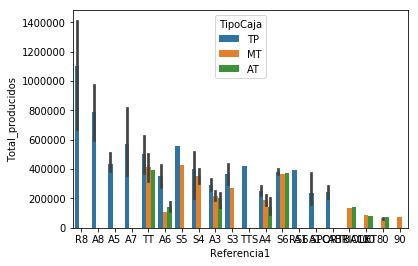

In [30]:
sns.barplot(data = gama_alta, x = gama_alta.Referencia1[gama_alta['Marca'] == 'AUDI'], y = 'Total_producidos',hue = 'TipoCaja')

In [31]:
gama_alta.Referencia1[gama_alta['Marca'] == 'AUDI'].unique()

array(['R8', 'A8', 'A5', 'A7', 'TT', 'A6', 'S5', 'S4', 'A3', 'S3', 'TTS',
       'A4', 'S6', 'RS6', 'A1', 'A1 SPORTBACK', 'CABRIOLET', '100', '80',
       '90'], dtype=object)

In [32]:
gran_produccion = gama_alta.Referencia1[(gama_alta['Total_producidos'] > 1250000) & (gama_alta['Total_producidos'] < 1550000) ].reset_index(drop = True) #& (gama_alta['Marca'].isin(['BMW','AUDI','MERCEDES BENZ']))]
gran_produccion

0       M5
1     740i
2       R8
3       M3
4    750Li
5       M4
6     S 63
7       M3
Name: Referencia1, dtype: object

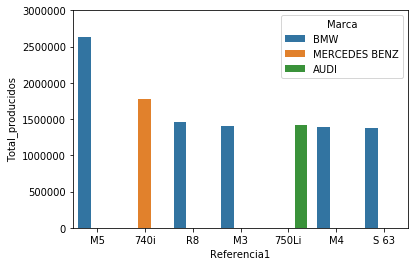

In [33]:
sns.barplot(data = gama_alta, x = gran_produccion, y = gama_alta['Total_producidos'], hue = 'Marca', ci = None)
plt.axis([None, None, None, 3000000])
plt.show()

In [34]:
grafica_1 = gama_alta.drop(['Novedad','Clase', 'Codigo','Referencia2',
       'Referencia3', 'Peso', 'IdServicio', 'Servicio',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018','Bcpp', 'Importado', 'Potencia', 'TipoCaja', 'Cilindraje',
       'Nacionalidad', 'CapacidadPasajeros', 'CapacidadCarga', 'Puertas',
       'AireAcondicionado', 'Ejes', 'Estado', 'Combustible', 'Transmision',
       'Um', 'PesoCategoria'], axis = 1)

In [35]:
grafica_1

,Marca,Referencia1,Total_producidos
0,BMW,760Li,2636300
1,MERCEDES BENZ,AMG,1775700
2,BMW,M5,1460700
3,BMW,740i,1432000
4,AUDI,R8,1411600
5,BMW,M3,1384100
6,BMW,750Li,1382800
7,BMW,M4,1365800
8,MERCEDES BENZ,S 63,1265800
9,BMW,M3,1262100


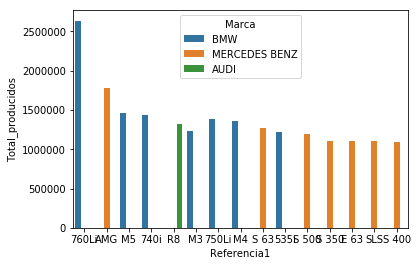

In [36]:
sns.barplot(data = grafica_1, x = grafica_1.Referencia1[:20], y = grafica_1.Total_producidos[:20],hue = 'Marca', ci = None)

In [37]:
peso_potencia = gama_alta.drop(['Novedad','Clase', 'Codigo','Referencia2',
       'Referencia3','IdServicio', 'Servicio',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018','Bcpp', 'Importado', 'TipoCaja', 'Cilindraje',
       'Nacionalidad', 'CapacidadPasajeros', 'CapacidadCarga', 'Puertas',
       'AireAcondicionado', 'Ejes', 'Estado', 'Combustible', 'Transmision',
       'Um', 'PesoCategoria'], axis = 1)

In [38]:
peso_potencia = peso_potencia[['Marca','Referencia1','Peso','Potencia','Total_producidos']]

In [39]:
peso_potencia.at[0,'Peso'] = 2180 #Cambiar un valor específico en el dataframe por index y nombre de la columna.

In [40]:
peso_potencia.head()

,Marca,Referencia1,Peso,Potencia,Total_producidos
0,BMW,760Li,2180,445,2636300
1,MERCEDES BENZ,AMG,1645,503,1775700
2,BMW,M5,1855,507,1460700
3,BMW,740i,1935,326,1432000
4,AUDI,R8,1660,430,1411600


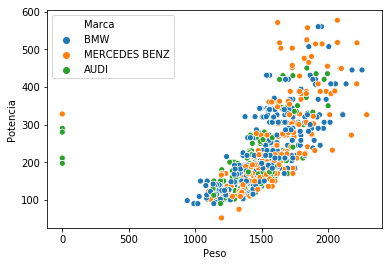

In [41]:
sns.scatterplot(data = peso_potencia, x = 'Peso', y = 'Potencia', hue = 'Marca')

In [42]:
peso_potencia[peso_potencia['Peso'] == 0]

,Marca,Referencia1,Peso,Potencia,Total_producidos
18,MERCEDES BENZ,S 400,0,328,1089500
31,AUDI,A8,0,290,890800
36,MERCEDES BENZ,CLS 400,0,328,842100
162,AUDI,TT,0,211,449600
321,AUDI,A3,0,197,294500
390,AUDI,S3,0,280,261600


In [43]:
peso_potencia[peso_potencia['Peso'] > 3000]

,Marca,Referencia1,Peso,Potencia,Total_producidos


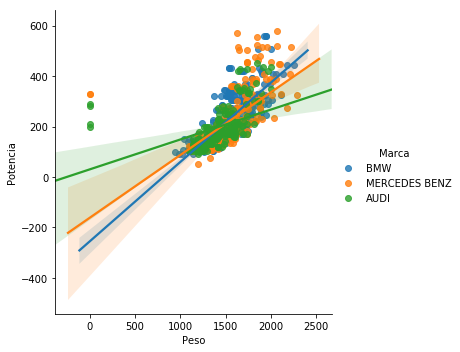

In [44]:
sns.lmplot(data = peso_potencia, x = 'Peso', y = 'Potencia', hue = 'Marca')

In [45]:
peso_potencia_numeros = peso_potencia[peso_potencia['Peso'] != 0]

In [46]:
pd.options.display.max_rows

60

In [47]:
peso_potencia_numeros.iloc[500:][:]

,Marca,Referencia1,Peso,Potencia,Total_producidos
506,AUDI,A4,1590,220,191700
507,BMW,120i,1320,177,191400
508,MERCEDES BENZ,C 280,1569,228,191300
509,BMW,116i,1285,136,191000
510,AUDI,A4,1345,130,190800
511,AUDI,A3,1245,110,189800
512,AUDI,A3,1410,197,188000
513,AUDI,A3,1180,105,187100
514,BMW,Z4,1415,265,187100
515,BMW,850Ci,1865,300,187100


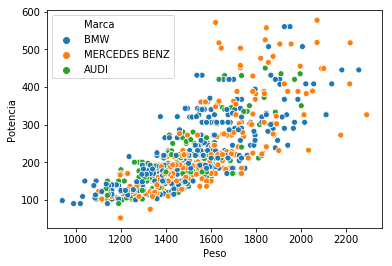

In [48]:
sns.scatterplot(data = peso_potencia_numeros, x = 'Peso', y = 'Potencia', hue = 'Marca')

In [49]:
peso_potencia_numeros.drop(columns = 'Referencia1', axis = 1, inplace = True)

In [50]:
#Cambiar el nombre de la marca por un valor numérico
peso_potencia_numeros.Marca = pd.Categorical(peso_potencia_numeros.Marca)
peso_potencia_numeros['Codigo_marca'] = peso_potencia_numeros.Marca.cat.codes
peso_potencia_numeros.head()

,Marca,Peso,Potencia,Total_producidos,Codigo_marca
0,BMW,2180,445,2636300,1
1,MERCEDES BENZ,1645,503,1775700,2
2,BMW,1855,507,1460700,1
3,BMW,1935,326,1432000,1
4,AUDI,1660,430,1411600,0


In [51]:
peso_potencia_numeros.drop(columns = 'Marca', axis = 1, inplace = True)

In [52]:
peso_potencia_numeros = peso_potencia_numeros [['Codigo_marca','Peso','Potencia','Total_producidos']]

In [53]:
peso_potencia_numeros.head()

,Codigo_marca,Peso,Potencia,Total_producidos
0,1,2180,445,2636300
1,2,1645,503,1775700
2,1,1855,507,1460700
3,1,1935,326,1432000
4,0,1660,430,1411600


In [54]:
corr_peso_potencia = peso_potencia_numeros.drop(columns = 'Codigo_marca', axis = 1)

In [55]:
corr_peso_potencia.head()

,Peso,Potencia,Total_producidos
0,2180,445,2636300
1,1645,503,1775700
2,1855,507,1460700
3,1935,326,1432000
4,1660,430,1411600


In [56]:
peso_potencia_numeros.describe()

,Codigo_marca,Peso,Potencia,Total_producidos
count,795.000000,795.000000,795.000000,7.950000e+02
mean,1.128302,1526.628931,219.324528,3.162507e+05
std,0.743497,212.559968,93.477043,2.612763e+05
min,0.000000,940.000000,52.000000,4.220000e+04
25%,1.000000,1390.000000,156.000000,1.300500e+05
50%,1.000000,1505.000000,192.000000,2.523000e+05
75%,2.000000,1632.500000,262.500000,3.994500e+05
max,2.000000,2290.000000,577.000000,2.636300e+06


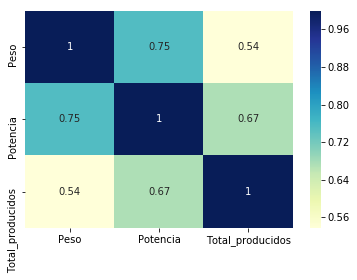

In [57]:
sns.heatmap(data = corr_peso_potencia.corr(), annot = True, cmap = 'YlGnBu')

In [58]:
X = peso_potencia_numeros[['Potencia','Total_producidos']]
y = peso_potencia_numeros[['Peso']]

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 58)

In [60]:
#Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_predict = linear_model.predict(X_test)
print('Score: - ',linear_model.score(X_test,y_test))
print('R2: ',r2_score(y_test,linear_predict))

Score: -  0.5714360589117619
R2:  0.5714360589117619


In [61]:
#Pasar de un ndarray a pd.Series
my_list = map(lambda x: x[0], linear_predict)
predicted = pd.Series(my_list)

In [62]:
y_test.reset_index(drop = True, inplace = True)
data = {'Predicho' : predicted.round(decimals = 0)}
data ['Real'] = y_test.Peso.reset_index(drop = True)
datos = pd.DataFrame(data = data)
datos.head()

,Predicho,Real
0,1754.0,1710
1,1593.0,1570
2,1533.0,1830
3,1438.0,1385
4,1466.0,1390


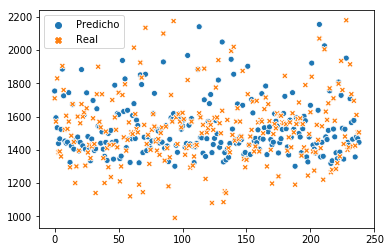

In [63]:
sns.scatterplot(data = datos)

**Conclusiones**

A partir de un pequeño análisis exploratorio se pudo determinar que:
* El modelo que más se produjo desde el año 2000 al 2017 de las marcas de interés es el 760 Li de BMW.
* No existe una correlación significativa entre el peso y la potencias de los vehículos.
* Aunque el dataset parecía estar ya limipio nos dimos cuenta de que exístian valores erróneos como algunos autos con peso de cero.
* Debido a que no se evidencia una relación lineal entre los datos un modelo de predicción lineal no es funcional.